In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

# ABOUT THIS NOTEBOOK

## Created for Kaggle playground series season 3, episode 21 - 8.26.23
This notebooks will be in two sections 1) EDA and 2) Predictions, first will mostly consist of making plots and cleaning the data. And when the data is ready we can feed to the model to prediction.

In [3]:
df = pd.read_csv('sample_submission.csv')

In [4]:
df.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,...,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,1,9.10,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,...,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,2,8.21,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,...,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,3,8.39,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,...,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,4,8.07,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,...,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


In [5]:
df.isna().any()

id        False
target    False
O2_1      False
O2_2      False
O2_3      False
O2_4      False
O2_5      False
O2_6      False
O2_7      False
NH4_1     False
NH4_2     False
NH4_3     False
NH4_4     False
NH4_5     False
NH4_6     False
NH4_7     False
NO2_1     False
NO2_2     False
NO2_3     False
NO2_4     False
NO2_5     False
NO2_6     False
NO2_7     False
NO3_1     False
NO3_2     False
NO3_3     False
NO3_4     False
NO3_5     False
NO3_6     False
NO3_7     False
BOD5_1    False
BOD5_2    False
BOD5_3    False
BOD5_4    False
BOD5_5    False
BOD5_6    False
BOD5_7    False
dtype: bool

OK we don't have any null or na values.

### The official kaggle explanation
> This is a very different type of challenge! For this challenge, your task is to improve a dataset that is being used to train a random forest model; in other words, your submission will be training data, not predictions. A random forest model will be trained on your submission, used to make predictions, and then those predictions will be used to generate your score.

> The dataset for this competition is a synthetic dataset based off of the Dissolved oxygen prediction in river water dataset. You are free to use the original in any way that you find useful.

> Please see important information on the Evaluation tab about the model that will be trained on your submitted data.

> Good luck!

Now we have the current dataset which has only data from 7 stations and it is used to build a random forest model. __So first we need to create a Random Forest to compare the output__ and then augment the data by adding 8th station to df and running it again by the same random forest (or another) to see the differences.

Let's create a random forest model.

In [6]:
indicators = ['O2', 'NH4', 'NO2', 'NO3', 'BOD5']

In [7]:
def get_seven_stations(indicator):
    col_names = [indicator + '_' + str(i) for i in range(1, 8)]
    return col_names

In [8]:
get_seven_stations(indicators[4])

['BOD5_1', 'BOD5_2', 'BOD5_3', 'BOD5_4', 'BOD5_5', 'BOD5_6', 'BOD5_7']

In [9]:
oxgen_col = get_seven_stations(indicators[1])

In [10]:
df[oxgen_col]

,NH4_1,NH4_2,NH4_3,NH4_4,NH4_5,NH4_6,NH4_7
0,0.180,0.200,0.650,14.515,5.845,1.285,0.429
1,1.107,1.027,1.848,8.625,12.175,0.280,0.440
2,0.020,0.020,0.650,17.144,24.645,0.380,0.440
3,0.280,0.270,1.730,3.870,8.410,1.480,1.380
4,0.360,0.435,0.650,3.850,5.845,0.280,0.440
...,...,...,...,...,...,...,...
3495,0.565,0.565,3.960,2.400,5.550,0.429,0.440
3496,1.300,2.200,1.640,4.140,12.175,1.285,1.570
3497,0.430,0.400,1.848,1.800,7.625,0.310,0.844
3498,0.300,0.200,1.160,8.625,12.175,1.285,0.429


In [11]:
np.corrcoef(df['O2_1'],df['O2_2'])

array([[1.        , 0.20475417],
       [0.20475417, 1.        ]])

In [12]:
def corr (x,y):
    return np.corrcoef(x, y) [0][1]

def show_corr(df, a, b):
    x,y = df [a], df[b]
    plt.scatter (x,y, alpha=0.5, s=4)
    plt.title(f'{a} vs {b}; r: {corr (x, y) : .2f}')

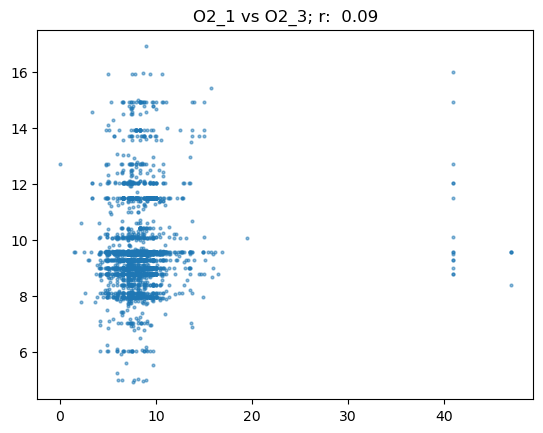

In [13]:
show_corr(df, 'O2_1','O2_3')

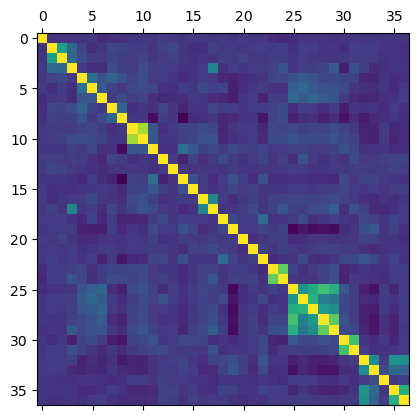

In [14]:
plt.matshow(df.corr())
plt.show()

I thought maybe there was a correlation between perhaps oxygen and nitrogen dioxide but there aren't any power connections, except for nitrate.

Let's check to TODO:

- [x] Look at the big picture.
- [x] Get the data.
- [x] Discover and visualize the data to gain insights.
- [ ] Prepare the data for Machine Learning algorithms.
- [ ] Select a model and train it.
- [ ] Fine-tune your model.
- [ ] Present your solution.
- [ ] Launch, monitor, and maintain your system.

### NOTE
This is part is quite useful, since it was the part where I learnt how to index columns, obviuosly with iloc. I wonder if it is also possible with 'loc'?

Another way which I thought up was to select like `df.iloc[:, 0]` and `df.iloc[:, 2:37]` and then add them to a big X df. More info on column based indexing on [Pandas Site](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html).

In [15]:
inx = np.ones((37))

In [16]:
inx[1] = 0

In [17]:
x_full = df.iloc[:, inx == True]

In [18]:
y_full = df.iloc[:, 1]
y_full.any() != df['target'].any()

False

In [19]:
np.max(y_full)

65.93

In [20]:
np.min(y_full)

# TODO test normalization

1.3

In [27]:
# Splitting the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.2)

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [29]:
rf_preds = rf.predict(x_test)

In [30]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, rf_preds)

1.0250467721049734

old MSE = 1.1714004560857145

new MSE = 1.3228116414285722

In [31]:
len(y_test) == len(rf_preds)

True

In [32]:
err_values = []

for i in y_test:
    err = (y_test - rf_preds) ** 2
    err_values.append(err)
err

2025    0.442168
3208    0.441053
561     0.088322
2034    0.007670
431     0.145727
          ...   
2935    0.552225
2059    1.719071
2021    0.220977
3187    0.239209
3347    0.004774
Name: target, Length: 700, dtype: float64

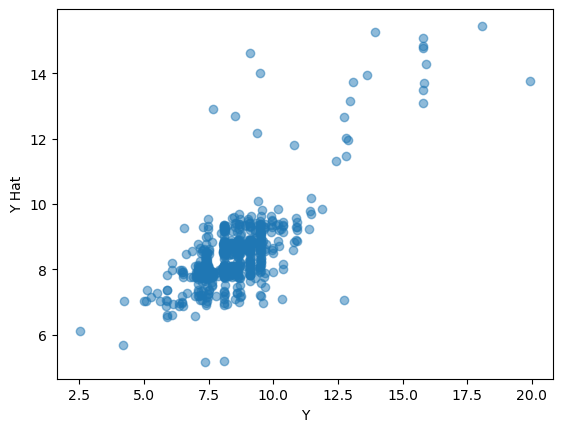

In [33]:
plt.scatter(y_test, rf_preds, alpha = 0.5)
# plt.xticks(ticks=[i for i in range(len(err_values))], labels=rf_preds)
plt.xlabel('Y')
plt.ylabel('Y Hat')
plt.show()

In [35]:
imporatnces = rf.feature_importances_

In [36]:
len(imporatnces)

36

([<matplotlib.axis.XTick at 0x7fe5ae5b9270>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35')])

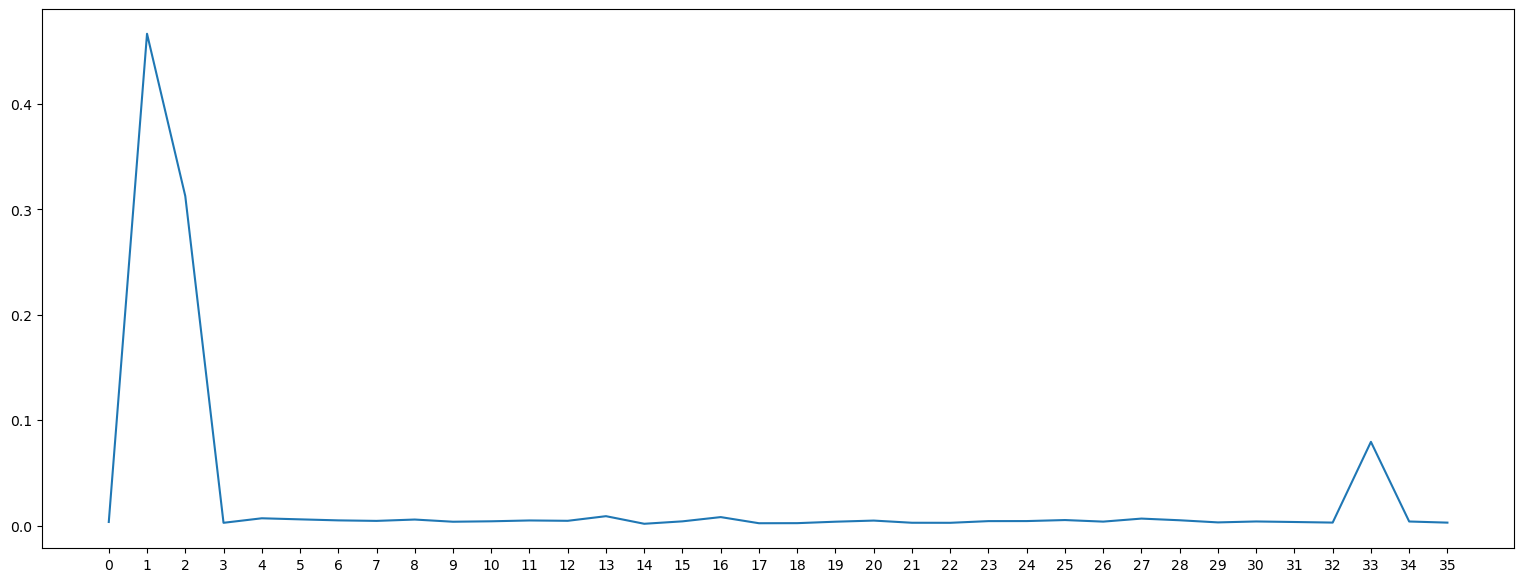

In [37]:
from matplotlib.pyplot import figure
figure(figsize=(19, 7))
plt.plot(imporatnces)
plt.xticks(np.arange(0, 36, step=1))

So the most importance columns are 2, 3, 34. Let's see what are these?

In [38]:
imporatnces = pd.Series(imporatnces)

In [39]:
imporatnces.sort_values(ascending=False, inplace=True)

In [40]:
imporatnces[imporatnces > imporatnces.mean()]

1     0.466548
2     0.312642
33    0.079453
dtype: float64

In [56]:
x_full.columns[[2, 3, 34]]

Index(['O2_2', 'O2_3', 'BOD5_6'], dtype='object')

Now I am going to train a Random Forest Regresson with only these three features and let's see how much MSE goes up? This will help to realize the real loss or lack of it by other feautres, maybe we could also combine other features imporatnce and compare but this is more fun.

In [42]:
minimal_train_data = []
minimal_test_data = []

for i in range(3, 18):
    minimal_inx = np.zeros_like(x_train.columns)
    minimal_inx[imporatnces[:i].index] = 1
    minimal_inx = minimal_inx == 1
    minimal_train_data.append(x_train.iloc[:, minimal_inx])
    minimal_test_data.append(x_test.iloc[:, minimal_inx])

In [43]:
all_features_mse = 1.3228116414285722


for i in range(0, len(minimal_test_data)):
    minimal_rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)
    
    
    minimal_rf.fit(minimal_train_data[i], y_train)
    minimal_preds = minimal_rf.predict(minimal_test_data[i])
    mse = mean_squared_error(y_test, minimal_preds)
    print(f'For the {i+3} features the mse is: {mse}')
    print(f'Compare to 36 features mse it is: ')
    print(f'{(all_features_mse-mse)}\n')

For the 3 features the mse is: 1.0420361153321054
Compare to 36 features mse it is: 
0.28077552609646683

For the 4 features the mse is: 1.0101803353867072
Compare to 36 features mse it is: 
0.31263130604186506

For the 5 features the mse is: 0.9937500261253996
Compare to 36 features mse it is: 
0.32906161530317257

For the 6 features the mse is: 0.9899727847384435
Compare to 36 features mse it is: 
0.3328388566901287

For the 7 features the mse is: 0.9891040560149612
Compare to 36 features mse it is: 
0.333707585413611

For the 8 features the mse is: 0.9769440319382057
Compare to 36 features mse it is: 
0.34586760949036655

For the 9 features the mse is: 0.9773510190323272
Compare to 36 features mse it is: 
0.345460622396245

For the 10 features the mse is: 1.0028361028364752
Compare to 36 features mse it is: 
0.31997553859209704

For the 11 features the mse is: 0.995106009735931
Compare to 36 features mse it is: 
0.3277056316926412

For the 12 features the mse is: 0.9958399929310475


OK the 36 features version of model had a mse of 1.3228116414285722 and the new (minimal) model has only 1.3232833197493163, only 4 ten-thousandth for 33 extra features. The sweet spot is around 10 features but other than that it would be 5 and 3 features.

## Checking for Outliers

In [44]:
# 5 features

minimal_inx = np.zeros_like(x_train.columns)
minimal_inx[imporatnces[:5].index] = 1
minimal_inx = minimal_inx == 1
five_f = x_train.iloc[:, minimal_inx]

In [45]:
five_f

,O2_1,O2_2,NH4_6,NO2_2,BOD5_5
759,7.10,7.60,0.380,0.058,6.250
416,8.10,6.10,0.310,0.006,8.415
2341,8.10,8.50,0.310,0.015,7.700
2434,8.10,7.80,0.429,0.072,5.200
3336,9.70,4.98,0.280,0.060,8.400
...,...,...,...,...,...
1138,9.70,8.20,0.280,0.470,7.640
2081,7.15,7.15,0.380,0.054,6.025
576,9.10,8.20,1.285,0.095,6.750
3082,9.70,9.10,0.429,0.020,6.025


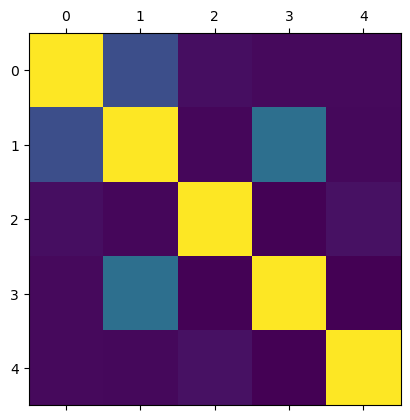

In [46]:
plt.matshow(five_f.corr())
plt.show()

In [71]:
five_f.describe()

,O2_1,O2_2,NH4_6,NO2_2,BOD5_5
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,8.246500,9.422689,0.462924,0.083990,7.844681
std,3.130577,7.029706,0.303741,0.047076,3.778436
min,1.490000,2.310000,0.052000,0.052000,2.020000
25%,7.100000,7.367000,0.310000,0.052000,5.750000
50%,7.916500,8.300000,0.380000,0.060000,7.500000
75%,9.100000,8.760000,0.429000,0.095000,8.400000
max,46.950000,65.950000,1.285000,0.200000,82.450000


In [62]:
NH4_cutoff

1.285

OK there are some jarring outliers, maybe let's get the ratio of how much data is outside of the IQR?

In [53]:
O21_cutoff = (five_f['O2_1'].quantile(0.9))
O22_cutoff = (five_f['O2_2'].quantile(0.9))
NH4_cutoff = (five_f['NH4_6'].quantile(0.9))
NO2_cutoff = (five_f['NO2_2'].quantile(0.9))
BOD5_cutoff = (five_f['BOD5_5'].quantile(0.9))

# Clip the last 10 percentiles

# TODO test normalization

In [54]:
print(len(five_f[five_f['O2_1'] <= O21_cutoff])/len(five_f)* 100)
print(len(five_f[five_f['O2_2'] <= O22_cutoff])/len(five_f)* 100)
print(len(five_f[five_f['NH4_6'] <= O24_cutoff])/len(five_f)* 100)
print(len(five_f[five_f['NO2_2'] <= NH4_cutoff])/len(five_f)* 100)
print(len(five_f[five_f['BOD5_5'] <= BOD5_cutoff])/len(five_f)* 100)

93.14285714285714
90.0
99.32142857142857
98.39285714285714
90.42857142857143


In [69]:
five_f = five_f.copy()

In [70]:
five_f['NH4_6'] = five_f['NH4_6'].clip(five_f['NH4_6'].min(), NH4_cutoff)
five_f['NO2_2'] = five_f['NO2_2'].clip(five_f['NH4_6'].min(), NO2_cutoff)

I don't think this kind of mechanical cut off would be beneficial for anything except for NH4_5 and NO2_2

In [72]:
five_f.describe()

,O2_1,O2_2,NH4_6,NO2_2,BOD5_5
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,8.246500,9.422689,0.462924,0.083990,7.844681
std,3.130577,7.029706,0.303741,0.047076,3.778436
min,1.490000,2.310000,0.052000,0.052000,2.020000
25%,7.100000,7.367000,0.310000,0.052000,5.750000
50%,7.916500,8.300000,0.380000,0.060000,7.500000
75%,9.100000,8.760000,0.429000,0.095000,8.400000
max,46.950000,65.950000,1.285000,0.200000,82.450000


(array([2.633e+03, 9.800e+01, 1.300e+01, 5.400e+01, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 2.02 , 10.063, 18.106, 26.149, 34.192, 42.235, 50.278, 58.321,
        66.364, 74.407, 82.45 ]),
 <BarContainer object of 10 artists>)

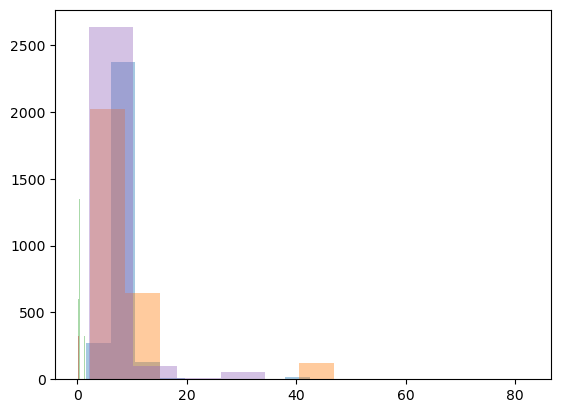

In [74]:
plt.hist(five_f['O2_1'], alpha=0.4)
plt.hist(five_f['O2_2'], alpha=0.4)
plt.hist(five_f['NH4_6'], alpha=0.4)
plt.hist(five_f['NO2_2'], alpha=0.4)
plt.hist(five_f['BOD5_5'], alpha=0.4)

This is a skewed data, log might help us.

In [75]:
n_o2 = np.log1p(five_f['O2_1'])

In [77]:
five_f['O2_1_LOG'] = np.log1p(five_f['O2_1'])
five_f['O2_2_LOG'] = np.log1p(five_f['O2_2'])
five_f['NH4_6_LOG'] = np.log1p(five_f['NH4_6'])
five_f['NO2_2_LOG'] = np.log1p(five_f['NO2_2'])
five_f['BOD5_5_LOG'] = np.log1p(five_f['BOD5_5'])

,O2_1,O2_2,NH4_6,NO2_2,BOD5_5,O2_1_LOG,O2_2_LOG,NH4_6_LOG,NO2_2_LOG,BOD5_5_LOG
759,2.091864,2.151762,0.322083,0.056380,1.981001,1.128774,1.147962,0.279209,0.054848,1.092259
416,2.208274,1.960095,0.270027,0.050693,2.242304,1.165733,1.085221,0.239038,0.049450,1.176284
2341,2.208274,2.251292,0.270027,0.050693,2.163323,1.165733,1.179052,0.239038,0.049450,1.151623
2434,2.208274,2.174752,0.356975,0.069526,1.824549,1.165733,1.155229,0.305258,0.067216,1.038349
3336,2.370244,1.788421,0.246860,0.058269,2.240710,1.214985,1.025475,0.220628,0.056634,1.175792
...,...,...,...,...,...,...,...,...,...,...
1138,2.370244,2.219203,0.246860,0.182322,2.156403,1.214985,1.169134,0.220628,0.167480,1.149433
2081,2.098018,2.098018,0.322083,0.052592,1.949475,1.130763,1.130763,0.279209,0.051256,1.081627
576,2.312535,2.219203,0.826366,0.090754,2.047693,1.197714,1.169134,0.602328,0.086870,1.114385
3082,2.370244,2.312535,0.356975,0.050693,1.949475,1.214985,1.197714,0.305258,0.049450,1.081627


In [88]:
def log_it(dataframe):
    return np.log1p(dataframe)

(array([2.200e+01, 1.000e+01, 1.307e+03, 1.315e+03, 4.200e+01, 4.300e+01,
        5.500e+01, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([1.10525683, 1.43715591, 1.769055  , 2.10095408, 2.43285316,
        2.76475224, 3.09665132, 3.4285504 , 3.76044949, 4.09234857,
        4.42424765]),
 <BarContainer object of 10 artists>)

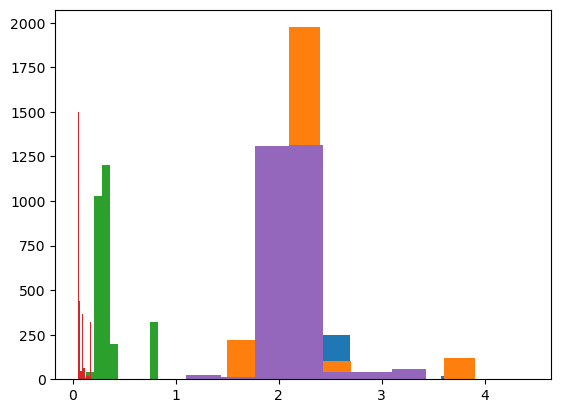

In [78]:
plt.hist(five_f['O2_1_LOG'])
plt.hist(five_f['O2_2_LOG'])
plt.hist(five_f['NH4_6_LOG'])
plt.hist(five_f['NO2_2_LOG'])
plt.hist(five_f['BOD5_5_LOG'])

In [81]:
five_f

,O2_1,O2_2,NH4_6,NO2_2,BOD5_5,O2_1_LOG,O2_2_LOG,NH4_6_LOG,NO2_2_LOG,BOD5_5_LOG
759,7.10,7.60,0.380,0.058,6.250,2.091864,2.151762,0.322083,0.056380,1.981001
416,8.10,6.10,0.310,0.052,8.415,2.208274,1.960095,0.270027,0.050693,2.242304
2341,8.10,8.50,0.310,0.052,7.700,2.208274,2.251292,0.270027,0.050693,2.163323
2434,8.10,7.80,0.429,0.072,5.200,2.208274,2.174752,0.356975,0.069526,1.824549
3336,9.70,4.98,0.280,0.060,8.400,2.370244,1.788421,0.246860,0.058269,2.240710
...,...,...,...,...,...,...,...,...,...,...
1138,9.70,8.20,0.280,0.200,7.640,2.370244,2.219203,0.246860,0.182322,2.156403
2081,7.15,7.15,0.380,0.054,6.025,2.098018,2.098018,0.322083,0.052592,1.949475
576,9.10,8.20,1.285,0.095,6.750,2.312535,2.219203,0.826366,0.090754,2.047693
3082,9.70,9.10,0.429,0.052,6.025,2.370244,2.312535,0.356975,0.050693,1.949475


In [83]:
five_f_log = five_f.iloc[:, 5:10]

In [84]:
five_f_log

,O2_1_LOG,O2_2_LOG,NH4_6_LOG,NO2_2_LOG,BOD5_5_LOG
759,2.091864,2.151762,0.322083,0.056380,1.981001
416,2.208274,1.960095,0.270027,0.050693,2.242304
2341,2.208274,2.251292,0.270027,0.050693,2.163323
2434,2.208274,2.174752,0.356975,0.069526,1.824549
3336,2.370244,1.788421,0.246860,0.058269,2.240710
...,...,...,...,...,...
1138,2.370244,2.219203,0.246860,0.182322,2.156403
2081,2.098018,2.098018,0.322083,0.052592,1.949475
576,2.312535,2.219203,0.826366,0.090754,2.047693
3082,2.370244,2.312535,0.356975,0.050693,1.949475


In [104]:
five_f_log

,O2_1_LOG,O2_2_LOG,NH4_6_LOG,NO2_2_LOG,BOD5_5_LOG
759,2.091864,2.151762,0.322083,0.056380,1.981001
416,2.208274,1.960095,0.270027,0.050693,2.242304
2341,2.208274,2.251292,0.270027,0.050693,2.163323
2434,2.208274,2.174752,0.356975,0.069526,1.824549
3336,2.370244,1.788421,0.246860,0.058269,2.240710
...,...,...,...,...,...
1138,2.370244,2.219203,0.246860,0.182322,2.156403
2081,2.098018,2.098018,0.322083,0.052592,1.949475
576,2.312535,2.219203,0.826366,0.090754,2.047693
3082,2.370244,2.312535,0.356975,0.050693,1.949475


In [106]:
five_f_log.columns

Index(['O2_1_LOG', 'O2_2_LOG', 'NH4_6_LOG', 'NO2_2_LOG', 'BOD5_5_LOG'], dtype='object')

In [108]:
five_f_test[five_f_log.columns]

,O2_1_LOG,O2_2_LOG,NH4_6_LOG,NO2_2_LOG,BOD5_5_LOG
2025,2.145931,2.219203,0.246860,0.099845,2.240710
3208,2.073172,1.840550,0.322083,0.048790,2.110213
561,2.091864,2.140066,0.246860,0.011929,2.242304
2034,2.240710,2.240710,0.246860,0.029559,1.905832
431,1.856298,2.012233,0.322083,0.065788,2.162748
...,...,...,...,...,...
2935,2.124295,2.254759,0.364643,0.055435,2.237193
2059,2.189752,2.295863,0.262364,0.032467,1.871802
2021,2.370244,2.292535,0.826366,0.090754,1.905832
3187,2.484907,2.258111,0.322083,0.176471,1.905832


In [100]:
nrf_r = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

nrf_r.fit(five_f_log, y_train)

RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [111]:
five_f_test = minimal_test_data[2]
five_f_test = five_f_test.copy()

In [110]:
five_f_test['O2_1_LOG'] = np.log1p(five_f_test['O2_1'])
five_f_test['O2_2_LOG'] = np.log1p(five_f_test['O2_2'])
five_f_test['NH4_6_LOG'] = np.log1p(five_f_test['NH4_6'])
five_f_test['NO2_2_LOG'] = np.log1p(five_f_test['NO2_2'])
five_f_test['BOD5_5_LOG'] = np.log1p(five_f_test['BOD5_5'])

KeyError: 'O2_1'

In [103]:
nrf_r.predict(log_it(five_f_test))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- BOD5_5
- NH4_6
- NO2_2
- O2_1
- O2_2


In [ ]:
nrf_r